# What Does My Neural Network Think?

In this code sample, we try to understand why the neural network made a particular prediction. We use visualization (a heatmap) to understand the decision-making that is going on within the network. Using color, we visually identify the areas within an image that prompted a decision. “Hot” spots, represented by warmer colors (red, orange, and yellow) highlight the areas with the maximum signal, whereas cooler colors (blue, purple) indicate low signal.

The `visualizer.py` script produces the heatmap for one or more input images, overlays it on the image, and stitches it side-by-side with the original image for comparison. The script accepts arguments for image path or a directory that contains frames of a video.

## Visualizing the Heatmap of an Image

In [ ]:
!pip install tensorflow==2.0.0
!pip install tf-explain==0.1.0
!pip install -U pillow
!pip install ffmpeg

In [16]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

# Mount your google drive where your image is located
from google.colab import drive
drive.mount('/content/drive')


!curl https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json --output imagenet_class_index.json

# Make sure to replace `cat.jpg` with you image name
!curl https://raw.githubusercontent.com/TEKSO/helper/master/cat.jpg --output cat.jpg

!curl https://raw.githubusercontent.com/TEKSO/helper/master/visualizer.py --output visualizer.py

# replace all the paths and the files with your own path and file as well
!cp '/content/drive/My Drive/Deep Learning/chapter2/store.mov' 'shop.mov'

!cp '/content/drive/My Drive/Deep Learning/chapter2/gatto.mp4' 'gatto.mp4'

# import the following libraries
import visualizer
from visualizer import process_video, process_image,Image

from google.colab import files

In [17]:
# use this to view the files on your current directly
!ls

cat.jpg		gatto.mp4		   sample_data	shop-output.mp4
cat_output.jpg	imagenet_class_index.json  shop.mov	shopping
drive		__pycache__		   shop_output	visualizer.py


In [3]:
# invoke the function to process the image
process_image("cat.jpg", "cat_output.jpg")

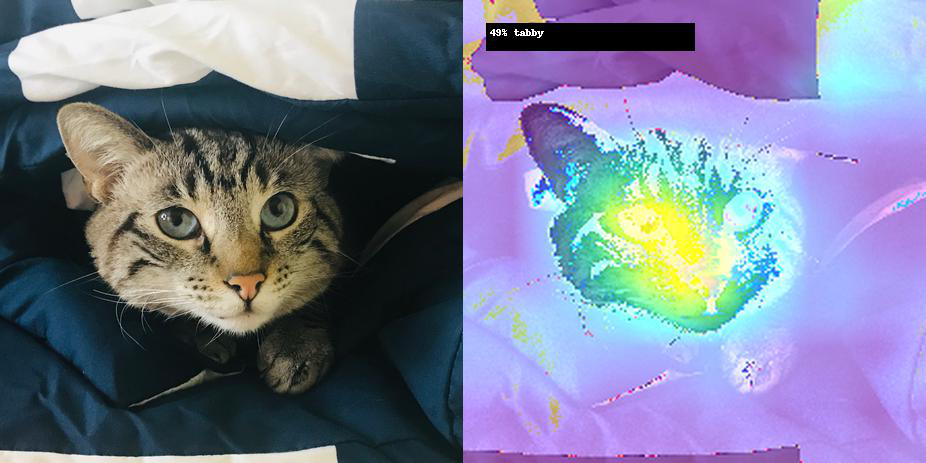

In [11]:
Image.open('cat_output.jpg')


The right half of the image indicates the “areas of heat” along with the correct prediction of a 'Cardigan Welsh Corgi'.

Note: As we can see below, the label is different from the labels shown in the book. This is because we use the [VGG-19](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) model in the visualization script.

## Visualizing the Heatmap of a Video

Before we can run the `visualization.py` script, we will need to use `ffmpeg` to split up a video into individual frames. Let's create a directory to store these frames and pass its name as an argument into the `ffmpeg` command.

In [20]:
# create a folder called 'kitchen' you can replace with preffered name

# !mkdir shopping
!mkdir gatto_fold


In [ ]:
# make sure to replace 'gatto.mp4' with the video file you downloaded from your google drive the current directory


# !ffmpeg -i shop.mov -vf fps=25 shopping/frame%04d.jpg -hide_banner
!ffmpeg -i gatto.mp4 -vf fps=25 gatto_fold/frame%04d.jpg -hide_banner


Now let's run the `visualization.py` script with the path of the directory containing the frames.

In [22]:
# invoke to process the videos the first parameter is the directory you created and the second is the prefix you would want
# to be added to the output file name

# process_video('shopping','shop')

process_video('gatto_fold','gat')


Compile a video from those frames using ffmpeg:

In [23]:
!ls

cat.jpg		gatto_fold		   sample_data	    shopping
cat_output.jpg	gatto.mp4		   shop.mov	    visualizer.py
drive		imagenet_class_index.json  shop_output
gat_output	__pycache__		   shop-output.mp4


In [ ]:
# !ffmpeg -framerate 25 -i shop_output/result-%04d.jpg shop-output.mp4

!ffmpeg -framerate 25 -i gat_output/result-%04d.jpg gat-output.mp4


In [25]:
# download the video to local directory. remember to replace 'grocery.mov' with the name you gave
files.download('shop-output.mp4')

files.download('gat-output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Perfect! Imagine generating heatmaps to analyze the strong points and shortfalls of your trained model or a pretrained model.
Give a STAR if you liked this notebook to motivate me.